In [1]:
import pandas as pd
import numpy as np

In [2]:
employee = [{'empno':1, 'ename':'kim','dept':1},
           {'empno':2, 'ename':'lee','dept':2},
           {'empno':3, 'ename':'park','dept':1},
           {'empno':4, 'ename':'song','dept':3},
           {'empno':5, 'ename':'min','dept':2}]
dept = [{'dept':1, 'deptname':'관리직'},
       {'dept':2, 'deptname':'영업직'},
       {'dept':3, 'deptname':'개발직'}]
info = [{'empno':1, 'addr':'서울시', 'phone':'010-1111-1111'},
       {'empno':3, 'addr':'부산시', 'phone':'010-2222-2222'},
       {'empno':2, 'addr':'광주시', 'phone':'010-3333-3333'},
       {'empno':5, 'addr':'광주시', 'phone':'010-4444-4444'},
       {'empno':4, 'addr':'광주시', 'phone':'010-5555-5555'}]


In [3]:
df_emp = pd.DataFrame(employee)
df_emp

,empno,ename,dept
0,1,kim,1
1,2,lee,2
2,3,park,1
3,4,song,3
4,5,min,2


In [4]:
df_dept = pd.DataFrame(dept)
df_dept

,dept,deptname
0,1,관리직
1,2,영업직
2,3,개발직


In [5]:
df_info = pd.DataFrame(info)
df_info

,empno,addr,phone
0,1,서울시,010-1111-1111
1,3,부산시,010-2222-2222
2,2,광주시,010-3333-3333
3,5,광주시,010-4444-4444
4,4,광주시,010-5555-5555


In [6]:
#merge : 공통 칼럼이 존재해야하며, 그 공통 칼럼을 기준으로 데이터프레임을 병합시킴.

In [7]:
pd.merge(df_emp,df_dept)

,empno,ename,dept,deptname
0,1,kim,1,관리직
1,3,park,1,관리직
2,2,lee,2,영업직
3,5,min,2,영업직
4,4,song,3,개발직


In [8]:
pd.merge(df_emp,df_dept, on = 'dept')

,empno,ename,dept,deptname
0,1,kim,1,관리직
1,3,park,1,관리직
2,2,lee,2,영업직
3,5,min,2,영업직
4,4,song,3,개발직


In [9]:
pd.merge(df_dept,df_emp, on = 'dept')

,dept,deptname,empno,ename
0,1,관리직,1,kim
1,1,관리직,3,park
2,2,영업직,2,lee
3,2,영업직,5,min
4,3,개발직,4,song


In [10]:
mg = pd.merge(df_emp,df_dept, on = 'dept')
mg.drop(columns = ['dept'], inplace = True)
mg

,empno,ename,deptname
0,1,kim,관리직
1,3,park,관리직
2,2,lee,영업직
3,5,min,영업직
4,4,song,개발직


In [11]:
mg1 = pd.merge(mg, df_info, on = 'empno')
mg1.drop(columns = ['empno'], inplace = True)
mg1

,ename,deptname,addr,phone
0,kim,관리직,서울시,010-1111-1111
1,park,관리직,부산시,010-2222-2222
2,lee,영업직,광주시,010-3333-3333
3,min,영업직,광주시,010-4444-4444
4,song,개발직,광주시,010-5555-5555


In [12]:
mg = pd.merge(df_emp,df_dept, on = 'dept')
mg.drop(columns = ['dept'], inplace = True)
mg

,empno,ename,deptname
0,1,kim,관리직
1,3,park,관리직
2,2,lee,영업직
3,5,min,영업직
4,4,song,개발직


In [14]:
pd.concat([df_emp, df_dept])
# default는 axis = 0(기본 디폴트는 열을 기준으로 정렬)
# merge와 차이점: []

,empno,ename,dept,deptname
0,1.0,kim,1,NaN
1,2.0,lee,2,NaN
2,3.0,park,1,NaN
3,4.0,song,3,NaN
4,5.0,min,2,NaN
0,NaN,NaN,1,관리직
1,NaN,NaN,2,영업직
2,NaN,NaN,3,개발직


In [16]:
pd.concat([df_emp, df_dept], axis = 1)
# ignol 사용X, 행을 기준으로 정렬, 그래서 dept는 중복되는 것

,empno,ename,dept,dept,deptname
0,1,kim,1,1.0,관리직
1,2,lee,2,2.0,영업직
2,3,park,1,3.0,개발직
3,4,song,3,NaN,NaN
4,5,min,2,NaN,NaN


In [18]:
dataframe = pd.read_csv('data.csv', encoding = 'utf-8')
dataframe
# 특성 33개가 칼럼에 들어있다....
# m은 양성, b는 악성?

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [19]:
dataframe.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [20]:
dataframe.info()
# 스크롤 왔다갔다 하는거 보기 쉽게 만들어 준다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
# 열만 뽑아서 보는 함수
colmn = dataframe.columns
colmn

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [27]:
# 데이터를 가공하기 전에..? 결측값을 확인하는 것이 중요!!
dataframe.isnull().sum()
# 오류: isnull 뒤에 ()로 빠짐

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [26]:
dataframe['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [34]:
# 문자열으르 숫자로 변환
# 변환해준 열을 '판정'으로 이름 짓고 dataframe에 추가 하기

def func1(row):
    if 'M' in row:
        return 1
    else:
        return 0
    
dataframe['판정'] = dataframe['diagnosis'].apply(func1)
dataframe.head()
# apply 함수 사용해서 '판정'이라는 열 추가하기
# apply 함수: 변수명: apply(함수명)
# (함수명)에 func1 넣기... 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,판정
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [42]:
# 불필요한 칼럼 삭제(id, diagnosis, Unnamed:32)
dr_dt = dataframe.drop(columns = ['id', 'diagnosis', 'Unnamed: 32'])
dr_dt.head()
# 오류: 칼럼명의 띄어쓰기를 안해서 인식을 못함...
# 괄호 안에 columns 빠트림..

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,판정
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

In [44]:
# seaborn: 시각화를 쉽게 맍들어주는 라이브러리의 한 종류
# 단독으로는 못 불러오고 항상 맷플롯립이랑 같이 써야 한다. 
import seaborn as sns

In [47]:
import matplotlib.pyplot as plt

In [50]:
# tips : seaborn에서 기본으로 제공하는 데이터셋
tips = sns.load_dataset('tips')
# 씨본에 연습용으로 들어있는 팁스의 값을 불러옴
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


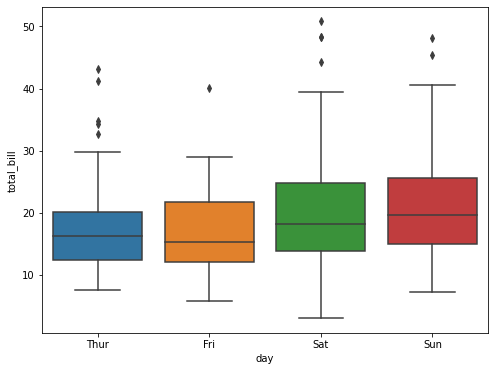

In [71]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'day', y = 'total_bill', data = tips)
# sns에 들어 있는 박스플롯을 블러온다. 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

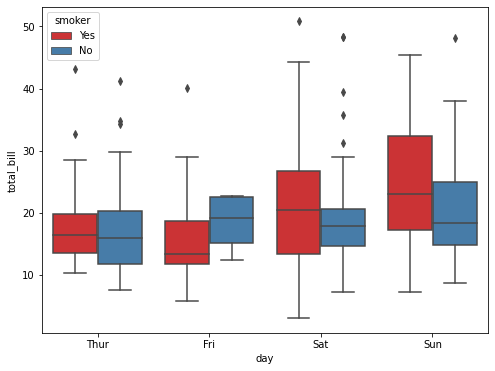

In [69]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', palette = 'Set1')
# hue : 데이터 추가 구분(in legend) 
# palette : 색상지정,,, Set1, 2, 3 세 가지 있는 듯..
plt.show

In [67]:
# histplot : 히스토그램 출력 plot
penguins = sns.load_dataset('penguins')
penguins.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

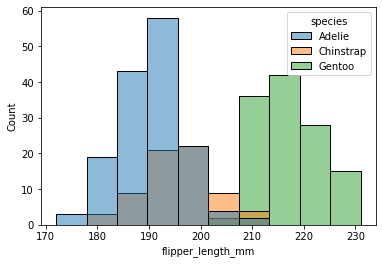

In [68]:
sns.histplot(data = penguins, x = 'flipper_length_mm', hue = 'species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

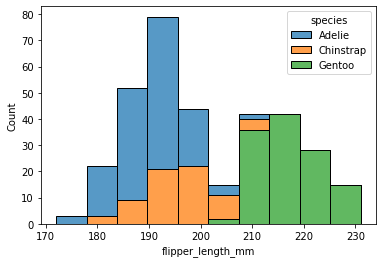

In [72]:
sns.histplot(data = penguins, x = 'flipper_length_mm', hue = 'species', multiple = 'stack')
# multiple = 'stack': 여러 개를 쌓아도 된다. 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

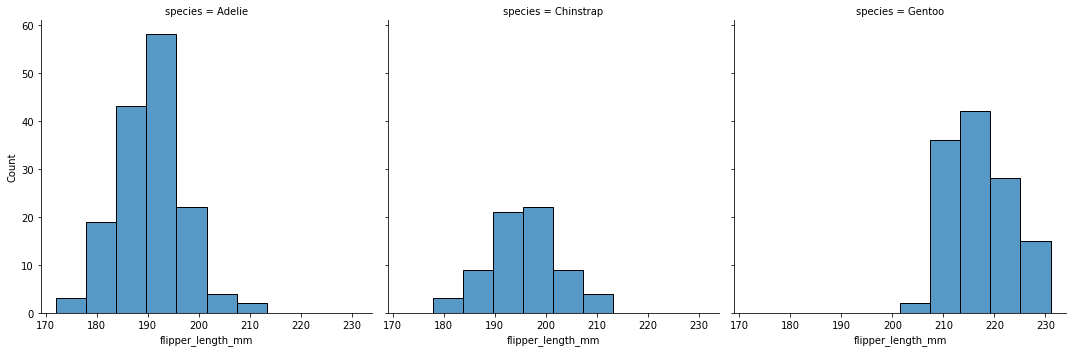

In [78]:
# displot : distribution을 subplot으로 나워서 출력
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', col = 'species')
# hue : 범례 역할..? 그래프를 더 보기 좋게 만든다. hue를 빼면 그래프 색상이 똑같아 짐.
# col에 들어간 변수를 기준으로 서브플롯을 여려 개 만들겠다.
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

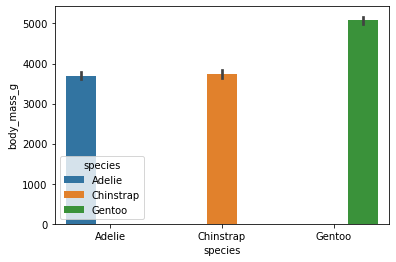

In [81]:
# barplot : 데이터 크기를 막대 그래프로 출력
sns.barplot(data = penguins, x = 'species',y = 'body_mass_g', hue = 'species')
plt.show
# x축, y축에 들어가는 값은 지정하면 되는데...hue, col...뭐지??

<function matplotlib.pyplot.show(close=None, block=None)>

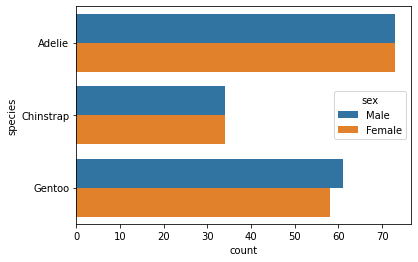

In [84]:
# countplot: 범주형 속성을 가지는 데이터의 히스토그램
sns.countplot(data = penguins, y = 'species', hue = 'sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

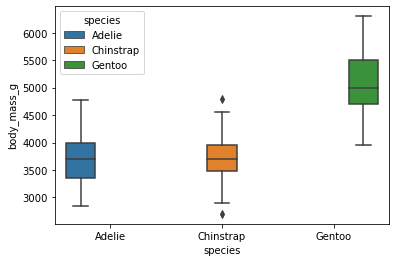

In [85]:
# boxplot vs violinplot
# boxplot : quantil 표시, 특정 데이터의 분포 확인에 용이, outlier 찾기에 용이
sns.boxplot(data = penguins, x = 'species', y = 'body_mass_g', hue = 'species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

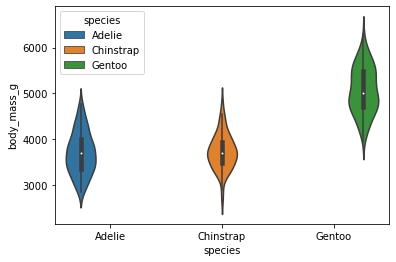

In [86]:
# violinplot : 전체 데이터에 대한 분포 확인 용이
sns.violinplot(data = penguins, x = 'species', y = 'body_mass_g', hue = 'species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

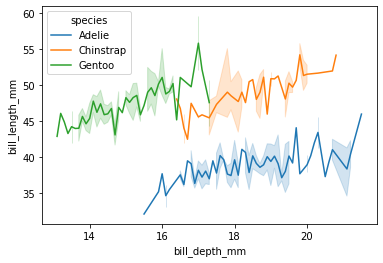

In [88]:
# lineplot : 선 그래프
sns.lineplot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

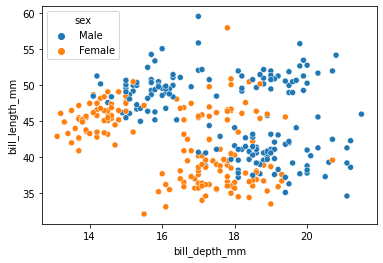

In [91]:
# scatterplot
sns.scatterplot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

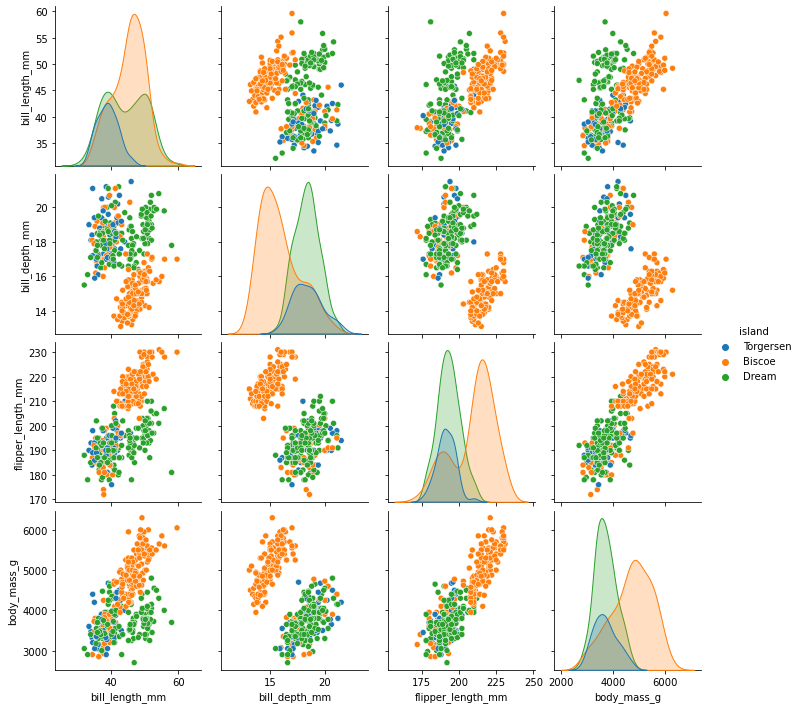

In [92]:
# pairplot : 데이터 각 feature들 사이의 모든 관계를 표시해 주는 plot
sns.pairplot(data = penguins, hue = 'island')
plt.show
# 표를 보고 데이터를 추정

In [93]:
# correlation
corr = penguins.corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

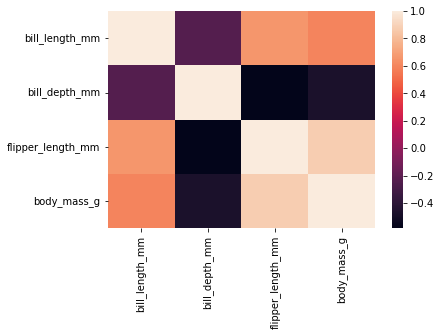

In [94]:
# heatmap
sns.heatmap(corr)
# 색상이 밝을수록 양의 상관 관계(비례), 색상이 어두울수록 음의 상관 관계(반비례)